In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
import pandas as pd

df = pd.concat([X, y], axis=1)   # axis=1 → concatenate column-wise


In [4]:
print(df.head)
print(df.describe)

<bound method NDFrame.head of      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010      

In [5]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [6]:
#Missing Values

print(df.isnull().sum())
#df.fillna(df.mean(), inplace=True)


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


In [7]:
#Target

print(df['Diagnosis'].nunique())
print(df['Diagnosis'].unique())


2
['M' 'B']


In [8]:
#Duplicate
df.duplicated().sum()

0

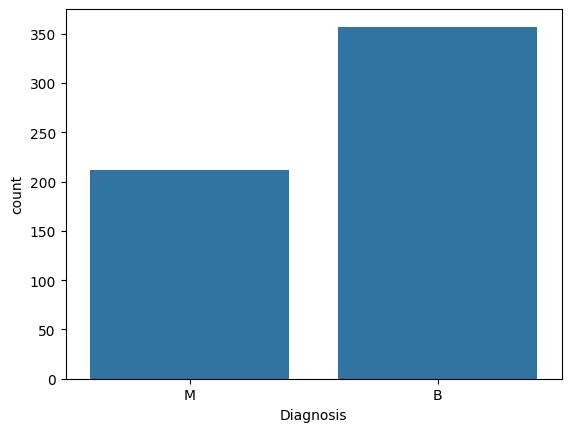

<Axes: ylabel='count'>

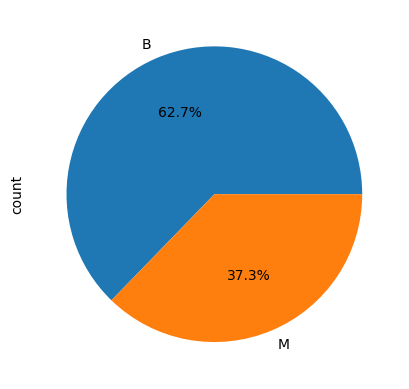

In [9]:
#target Class Distribution

sns.countplot(x='Diagnosis', data=df)
plt.show()
df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%')


In [10]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

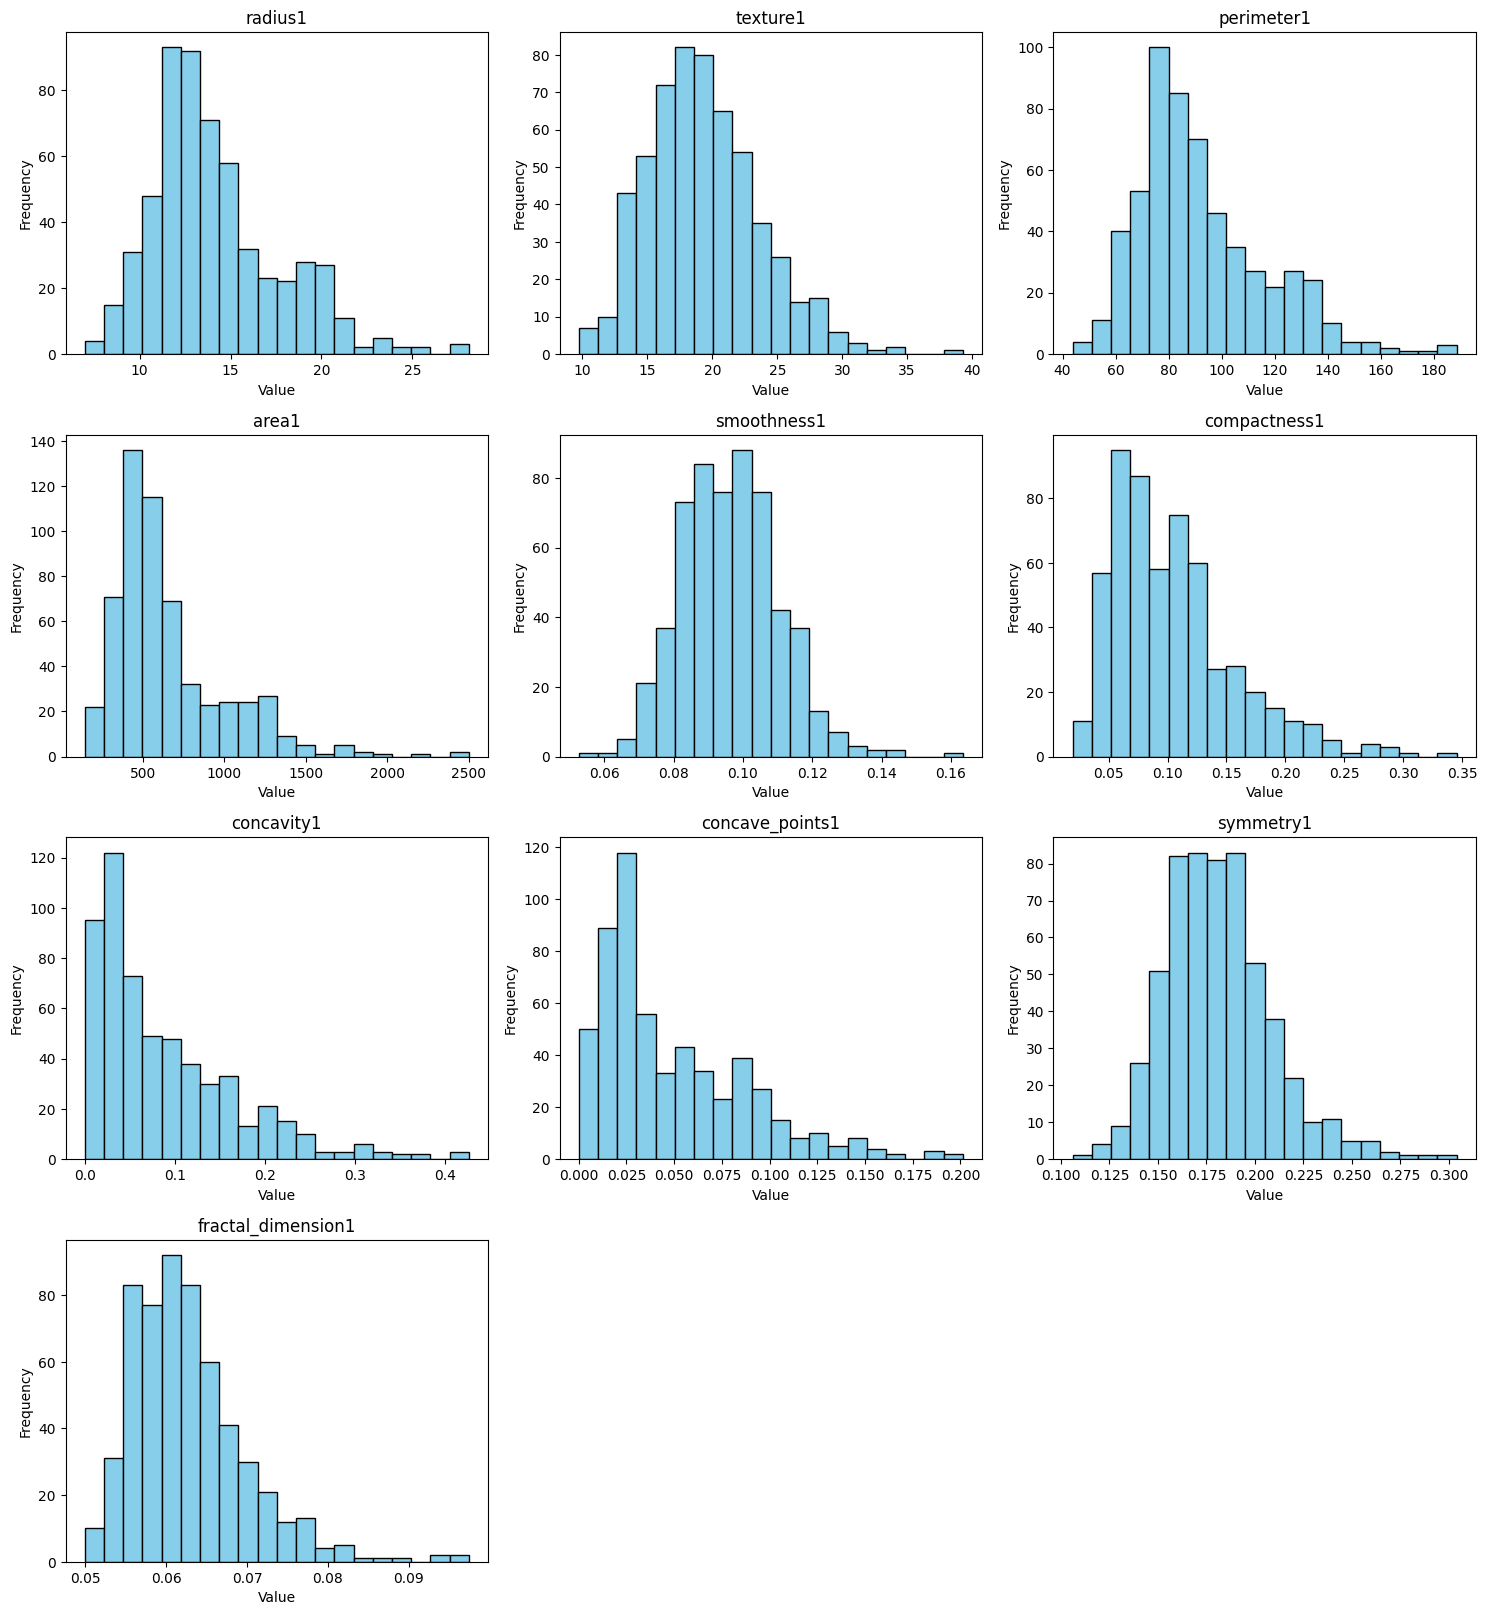

In [11]:
#Numeric Features
#Histogram

num_cols = len(df.columns)


n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns[:10]):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Value')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

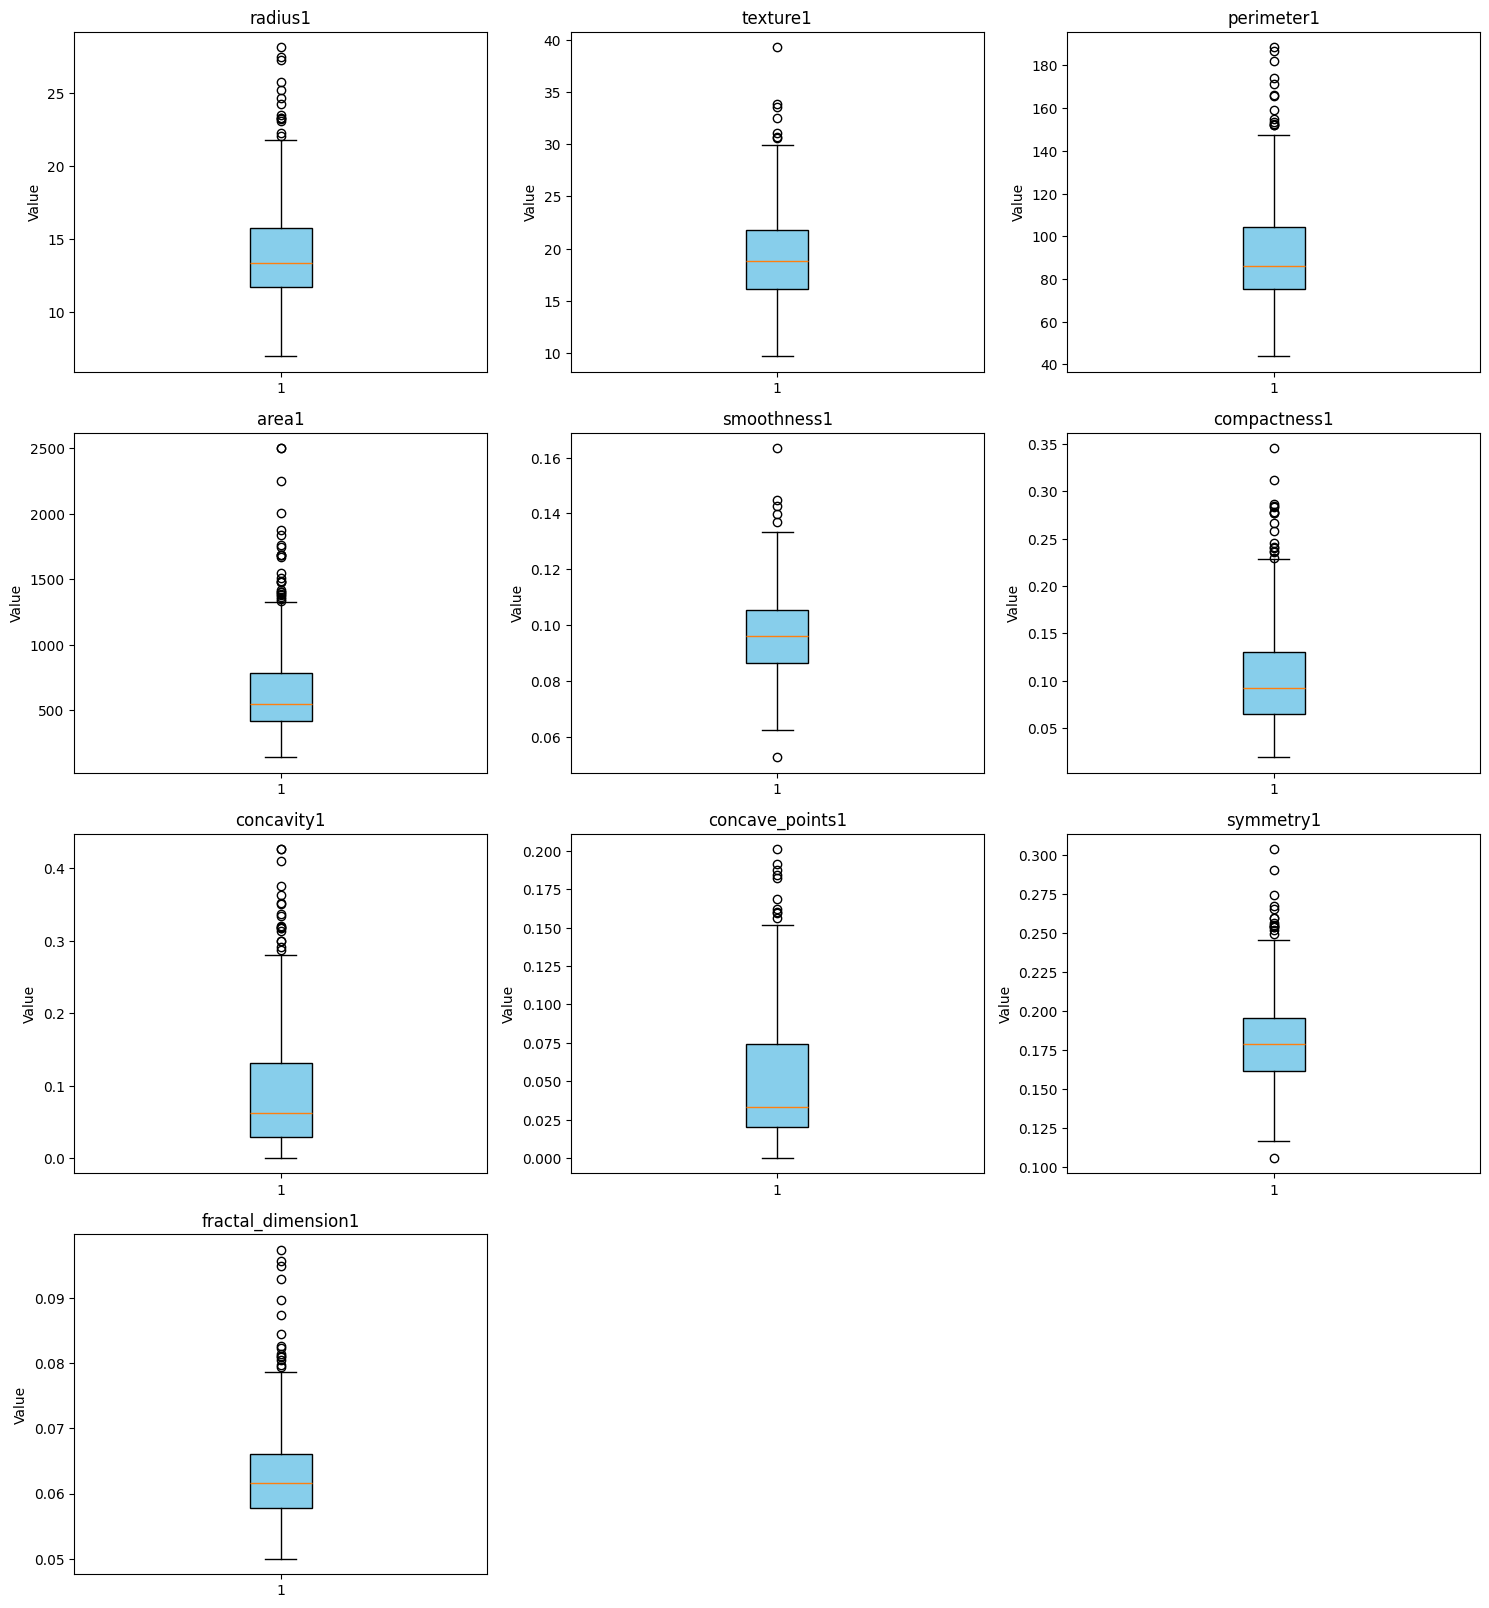

In [12]:
#Boxplot

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_cols)

# Define subplot grid size
n_cols = 3  # number of plots per row
n_rows = (num_cols + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Plot boxplot for each numeric column
for i, col in enumerate(numeric_cols[:10]):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

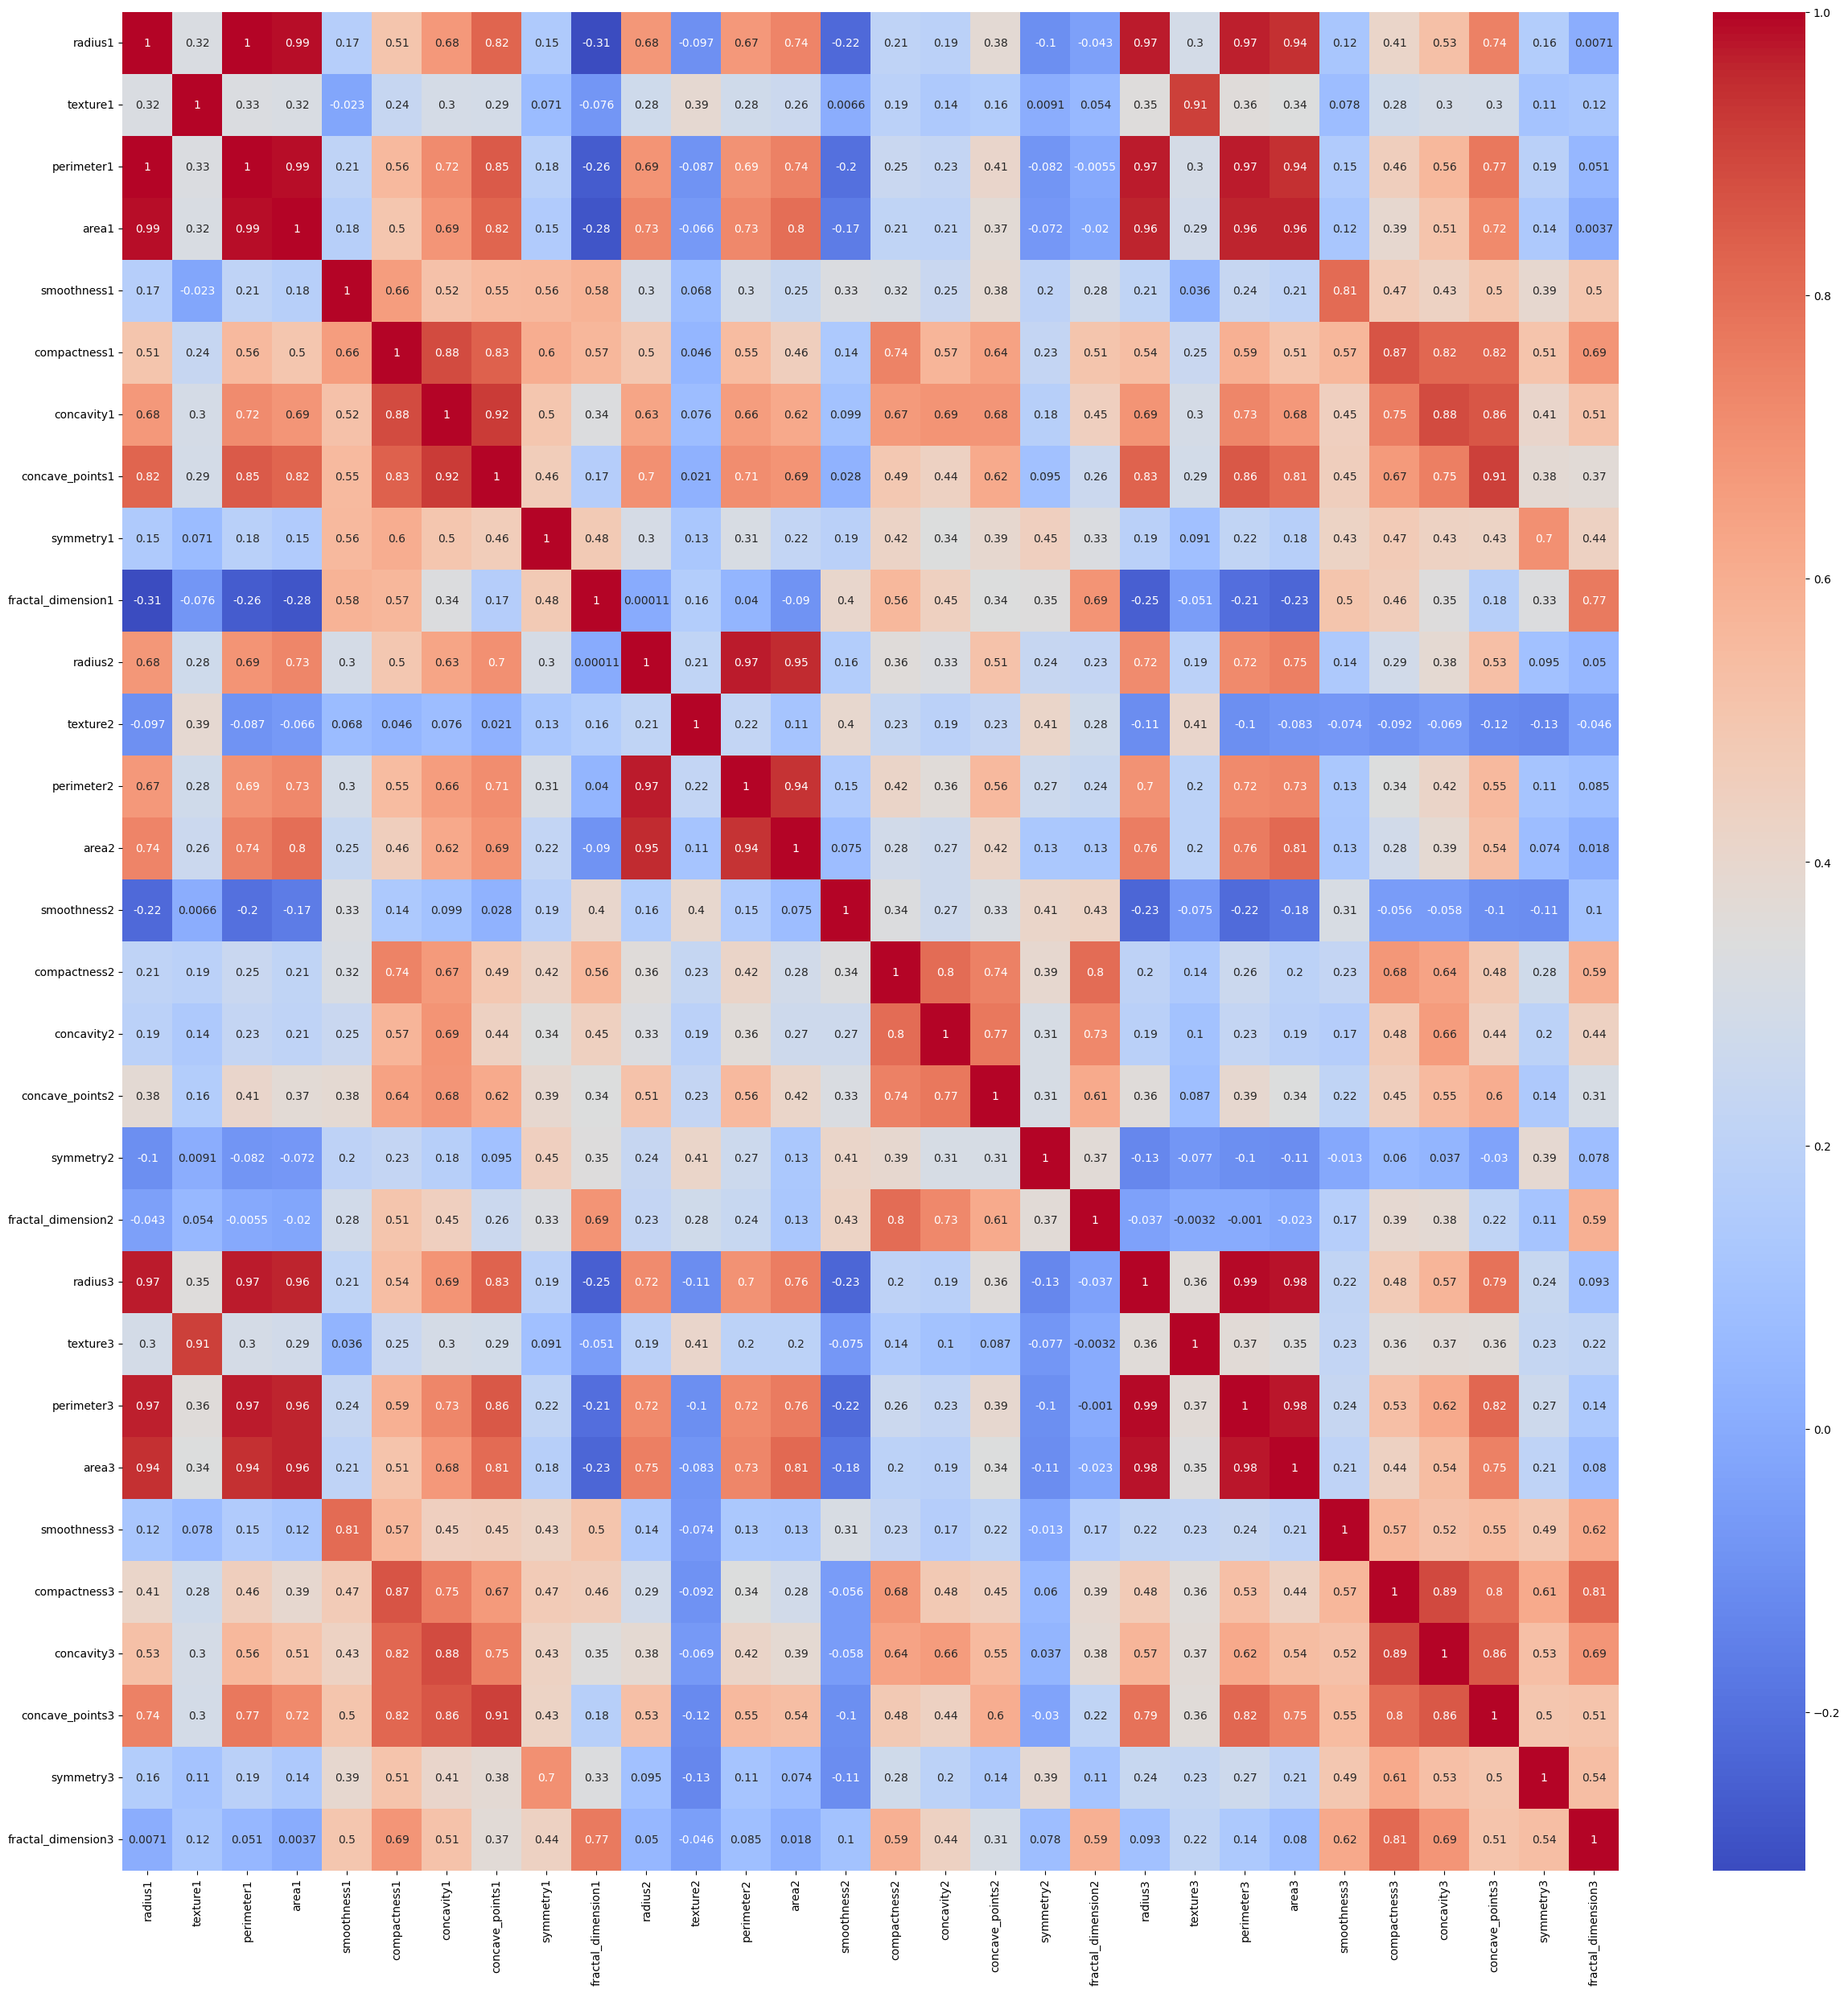

In [13]:
#Correlation Heatmap

plt.figure(figsize=(30,30))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [14]:
#Standardization

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df= pd.concat([X_scaled, y], axis=1)

print(df.head())


    radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1  1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2  1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3 -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4  1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0    2.652874         2.532475   2.217515            2.255747  ... -1.359293   
1   -0.023846         0.548144   0.001392           -0.868652  ... -0.369203   
2    1.363478         2.037231   0.939685           -0.398008  ... -0.023974   
3    1.915897         1.451707   2.867383            4.910919  ...  0.133984   
4    1.371011         1.428493  -0.009560           -0.562450  ... -1.466770   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    2.3

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode labels B/M → 0/1
le = LabelEncoder()
y = le.fit_transform(y)  # 'B' becomes 0, 'M' becomes 1


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Top 4 Hyperparameter Cases (Accuracy & F1 on Test Set):

Case 161: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
   Test Accuracy: 0.9649 | F1-score: 0.9500

Case 208: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
   Test Accuracy: 0.9649 | F1-score: 0.9500

Case 209: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
   Test Accuracy: 0.9649 | F1-score: 0.9500

Case 211: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
   Test Accuracy: 0.9649 | F1-score: 0.9500


Classification Report (Best Model):
               precision    recall  f1-score   support

      

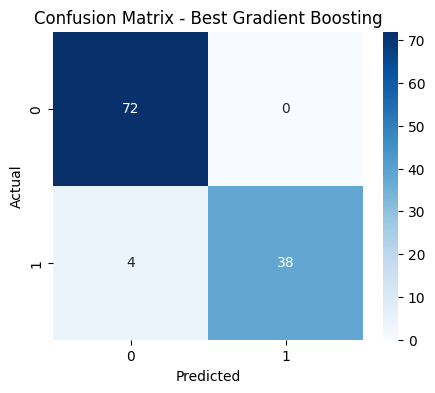

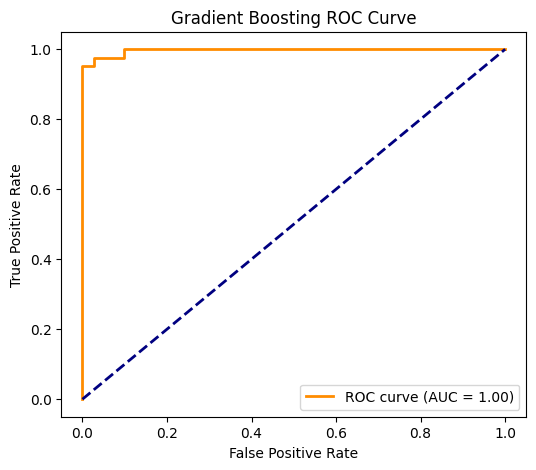

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# Encode target labels if categorical (B/M → 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [2, 3, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV with 5-Fold CV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# ---- Print Accuracy & F1 for top 4 cases ----
cv_results = pd.DataFrame(grid_search.cv_results_)
top4 = cv_results.nlargest(4, "mean_test_score")   # top 4 by accuracy

print("\nTop 4 Hyperparameter Cases (Accuracy & F1 on Test Set):\n")
for i, row in top4.iterrows():
    params = row["params"]
    model = GradientBoostingClassifier(
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred_case = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_case)
    f1 = f1_score(y_test, y_pred_case)
    print(f"Case {i}: {params}")
    print(f"   Test Accuracy: {acc:.4f} | F1-score: {f1:.4f}\n")

# ---- Final Best Model ----
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# ---- Confusion Matrix Plot ----
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Best Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- ROC Curve ----
y_prob = best_gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend(loc="lower right")
plt.show()
